<a href="https://colab.research.google.com/github/abhinkul/Melanoma-Detection/blob/main/Melanoma_detection_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import required libraries**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pathlib
import tensorflow as tf

import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation

In [2]:
# Import library for google drive connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2: Data reading and understanding**

In [3]:
# Unzip input folder file
!unzip '/content/drive/My Drive/CNN_assignment.zip' -d '/content/data'

Archive:  /content/drive/My Drive/CNN_assignment.zip
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: /content/data/Ski

In [4]:
# Define the directory for train and test data
data_dir_train = pathlib.Path('/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
data_dir_test = pathlib.Path('/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [5]:
# Count the number of image in Train and Test directory

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg'))) #glob used to extract filenames matching to .jpg pattern
print("No. of images used as train is ",image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("No. of images in test is ",image_count_test)

No. of images used as train is  2239
No. of images in test is  118


**Step 3: Dataset creation**

In [6]:
# Load dataset using image_dataset_from_directory() function, while resizing image with 180x180 pixels
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                    batch_size=32,
                                                                    image_size=(180,180), # Resize image to 180x180 size
                                                                    label_mode='categorical',
                                                                    seed=123)

Found 2239 files belonging to 9 classes.


In [7]:
# Extract all the classes of Skin Cancer from the dataset
class_names = image_dataset.class_names

In [9]:
# Store path of image as per the class in form of dictionary
classes_dict = {}

for c in class_names:
    classes_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

**Step 4: Data visualization**

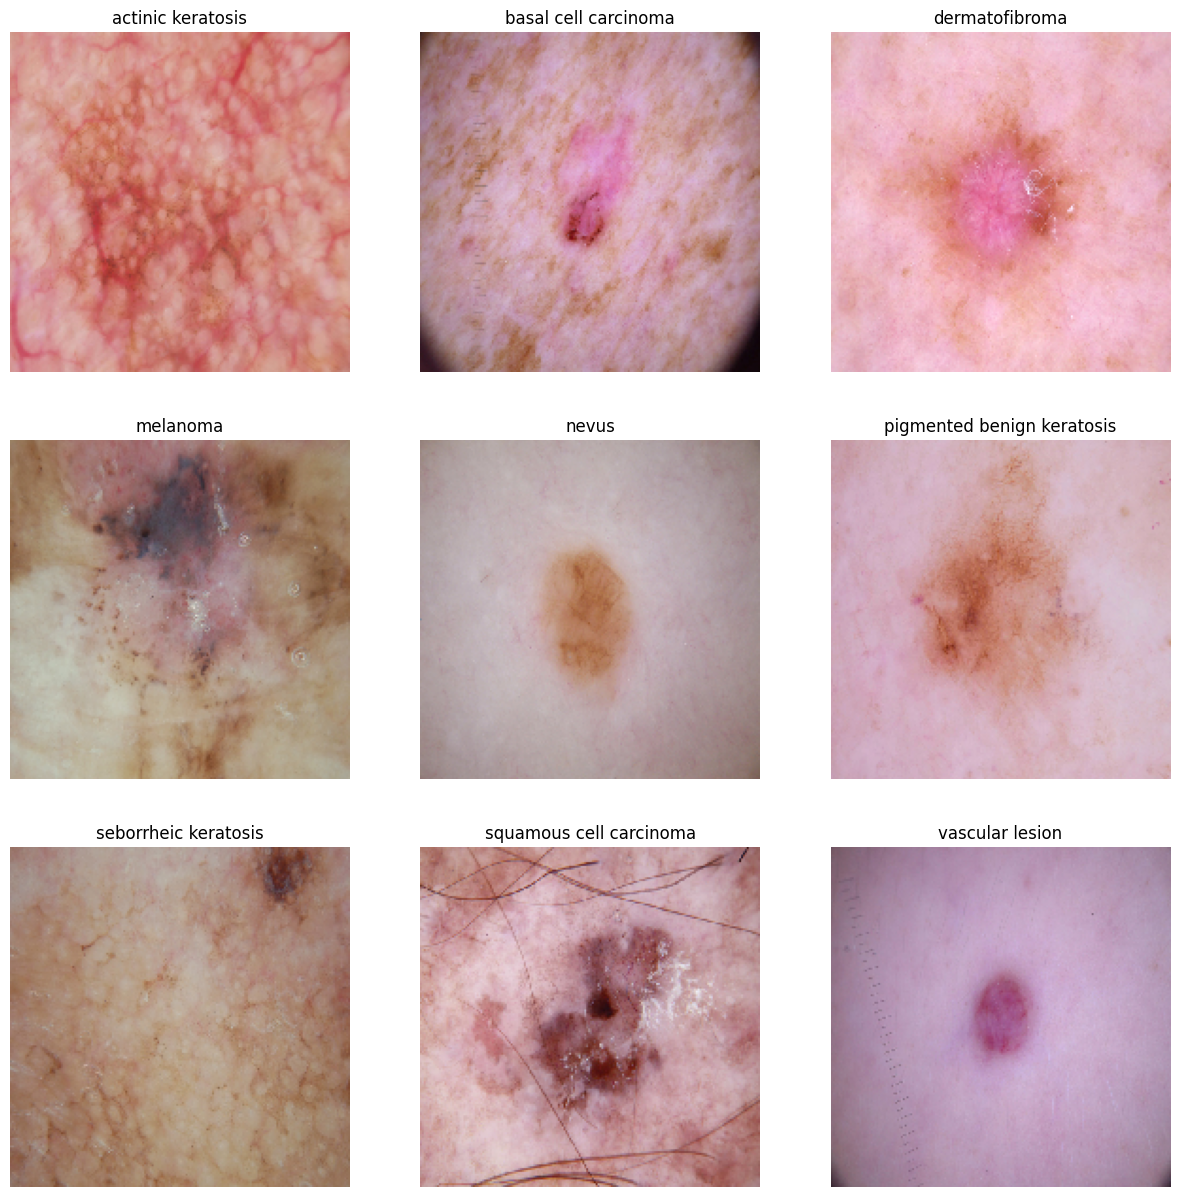

In [10]:
# Load library for data visualization
from tensorflow.keras.preprocessing.image import load_img

# Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = classes_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

**Step 5: Model building**

Step 5.1: Import 500 samples of each class using Augmentor

In [13]:
# Import Augmentor
!pip install Augmentor #<- use this command to install augmentor
import Augmentor

In [14]:
# Add 500 samples of each class
for i in class_names:
    p = Augmentor.Pipeline(data_dir_train / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC08039FA30>: 100%|██████████| 500/500 [00:24<00:00, 20.53 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC09A2CD6F0>: 100%|██████████| 500/500 [00:17<00:00, 28.64 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC0803D78B0>: 100%|██████████| 500/500 [00:17<00:00, 28.73 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BC08038A5F0>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7BC09A1D2AD0>: 100%|██████████| 500/500 [01:18<00:00,  6.36 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC08BC66D40>: 100%|██████████| 500/500 [00:17<00:00, 29.32 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BC08AF9DF60>: 100%|██████████| 500/500 [00:41<00:00, 12.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BC09A37AC20>: 100%|██████████| 500/500 [00:16<00:00, 29.55 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC09A44B670>: 100%|██████████| 500/500 [00:17<00:00, 28.54 Samples/s]


In [15]:
# Display count of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Step 5.2: Create dataset with 80% as train dataset and 20% as validation dataset

In [16]:
# Define parameters for dataset creation
batch_size = 32
img_height = 180
img_width = 180

In [17]:
# Train dataset
df_train = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size=(img_height,img_width),
                                                               label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [18]:
# Validation dataset
df_validation =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                   batch_size=batch_size,
                                                                   image_size=(img_height,img_width),
                                                                   label_mode='categorical',
                                                                   seed=123,subset="validation",
                                                                   validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [19]:
# Display names of the classes
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Step 5.3: Visualization

In [57]:
def class_distribution(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))] # Naming the classes

    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image']) # Return class and no. of images in it

df_input = class_distribution(data_dir_train)
df_input

,Class,No. of Image
0,squamous cell carcinoma,181
1,basal cell carcinoma,376
2,nevus,357
3,actinic keratosis,114
4,pigmented benign keratosis,462
5,seborrheic keratosis,77
6,vascular lesion,139
7,dermatofibroma,95
8,melanoma,438


Step 5.4: Model building

In [39]:
# Initialize sequential model
#from tensorflow.keras.layers import Normalization
model = Sequential()

# Rescaling
model.add(Rescaling(1./255, input_shape=(180, 180, 3)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
## Initialize convolution and Maxpool layers, and drop out layer

# First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Dropout layer
model.add(layers.Dropout(0.5)) # Drop 50% of the input

In [41]:
## Add Dense layer, Dropout layer along with activation function

# Flattening layer
model.add(layers.Flatten())

# Dense layer
model.add(layers.Dense(128,activation='relu'))

# Dropout layer
model.add(layers.Dropout(0.25)) #25% of input fraction to be dropped

# Dense Layer along with softmax activation function
model.add(layers.Dense(len(class_names),activation='softmax'))

In [42]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Step 5.5: Visualize model

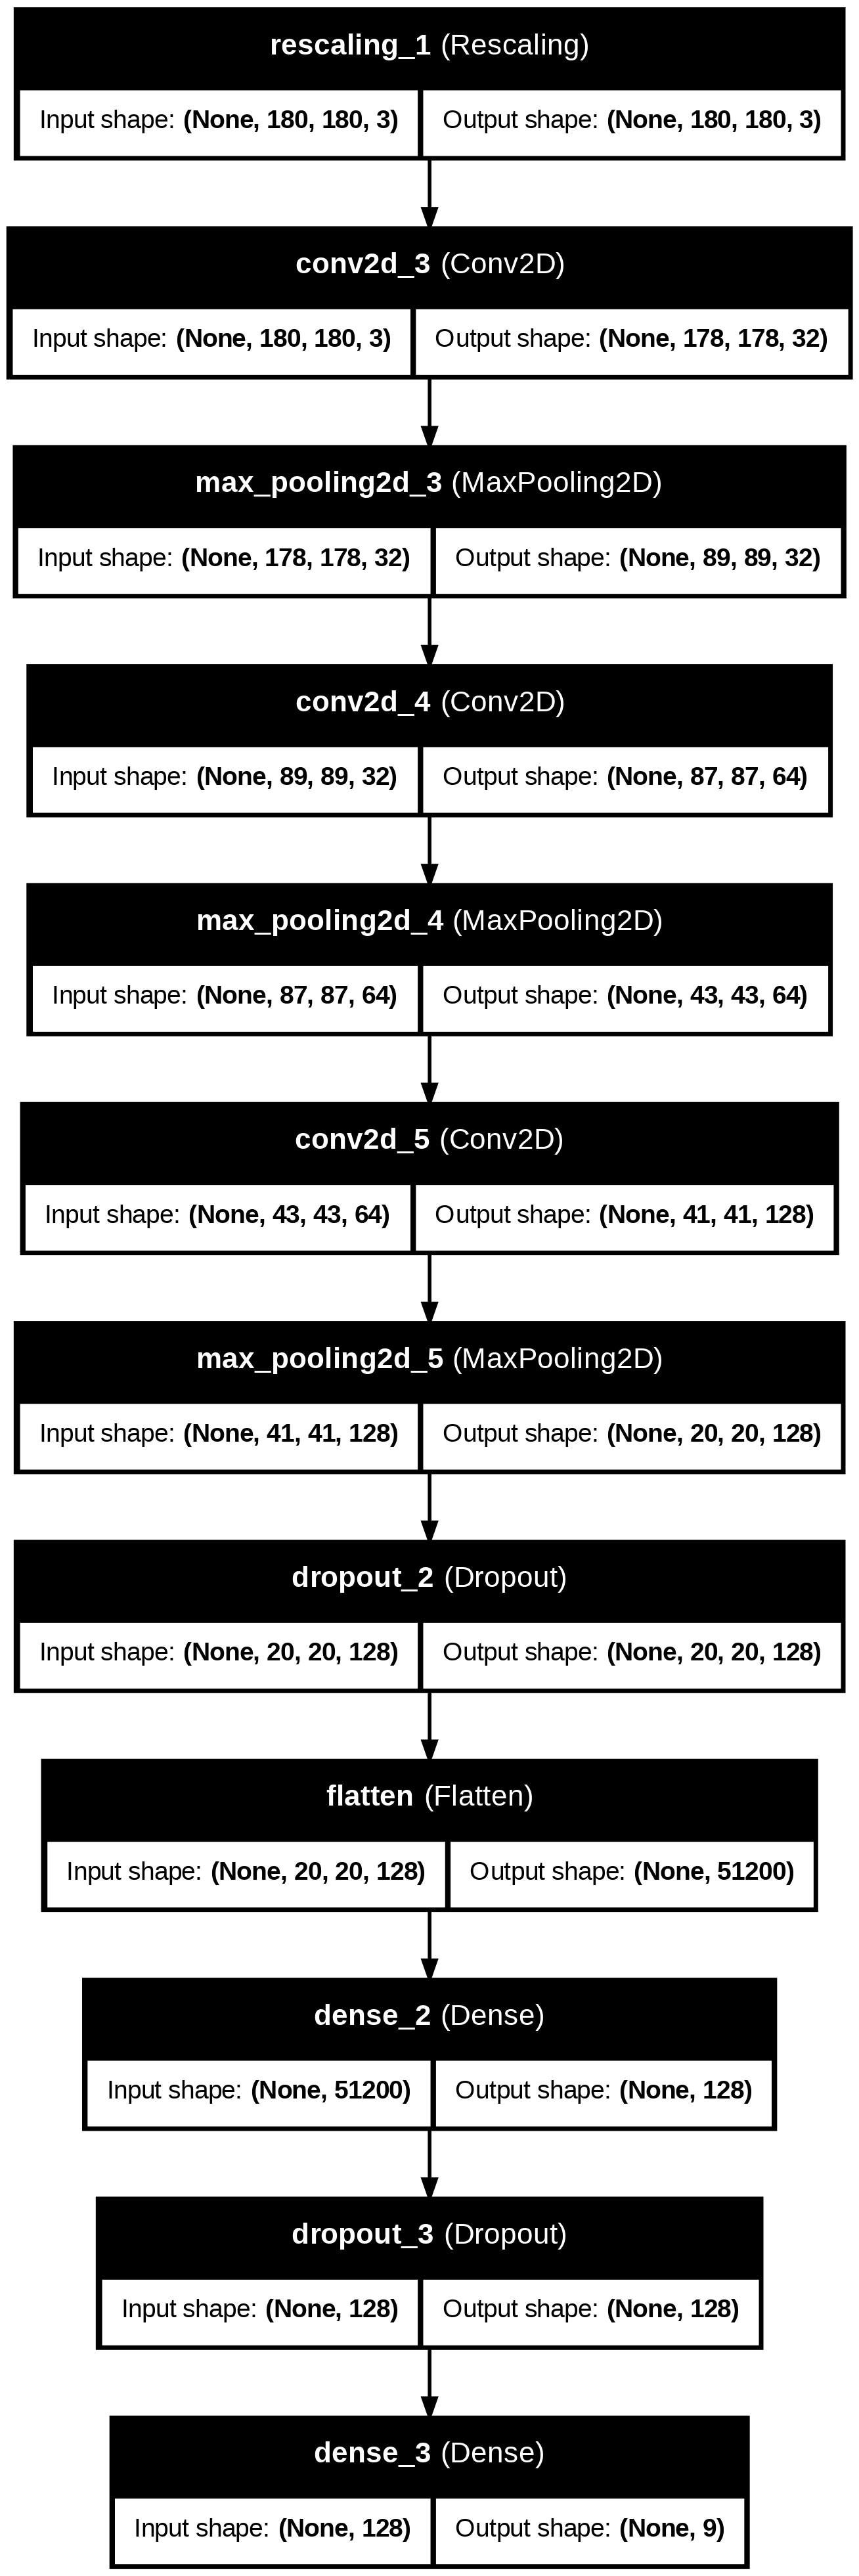

In [43]:
# Import liabrary
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Step 5.6: Model compilation

In [44]:
# Compile model with Adam optimization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

**Step 6: Model Training**

In [45]:
epochs = 20
history = model.fit(df_train, validation_data=df_validation, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.1901 - loss: 2.1777
Epoch 1: val_accuracy improved from -inf to 0.39495, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 46s 221ms/step - accuracy: 0.1905 - loss: 2.1764 - val_accuracy: 0.3950 - val_loss: 1.5804
Epoch 2/20
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3895 - loss: 1.5948
Epoch 2: val_accuracy improved from 0.39495 to 0.47587, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 66s 168ms/step - accuracy: 0.3897 - loss: 1.5944 - val_accuracy: 0.4759 - val_loss: 1.4058
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4743 - loss: 1.4165
Epoch 3: val_accuracy improved from 0.47587 to 0.52710, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 170ms/step - accuracy: 0.4744 - loss: 1.4163 - val_accuracy: 0.5271 - val_loss: 1.2357
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5233 - loss: 1.2502
Epoch 4: val_accuracy improved from 0.5

**Step 7: Visualizing the results**

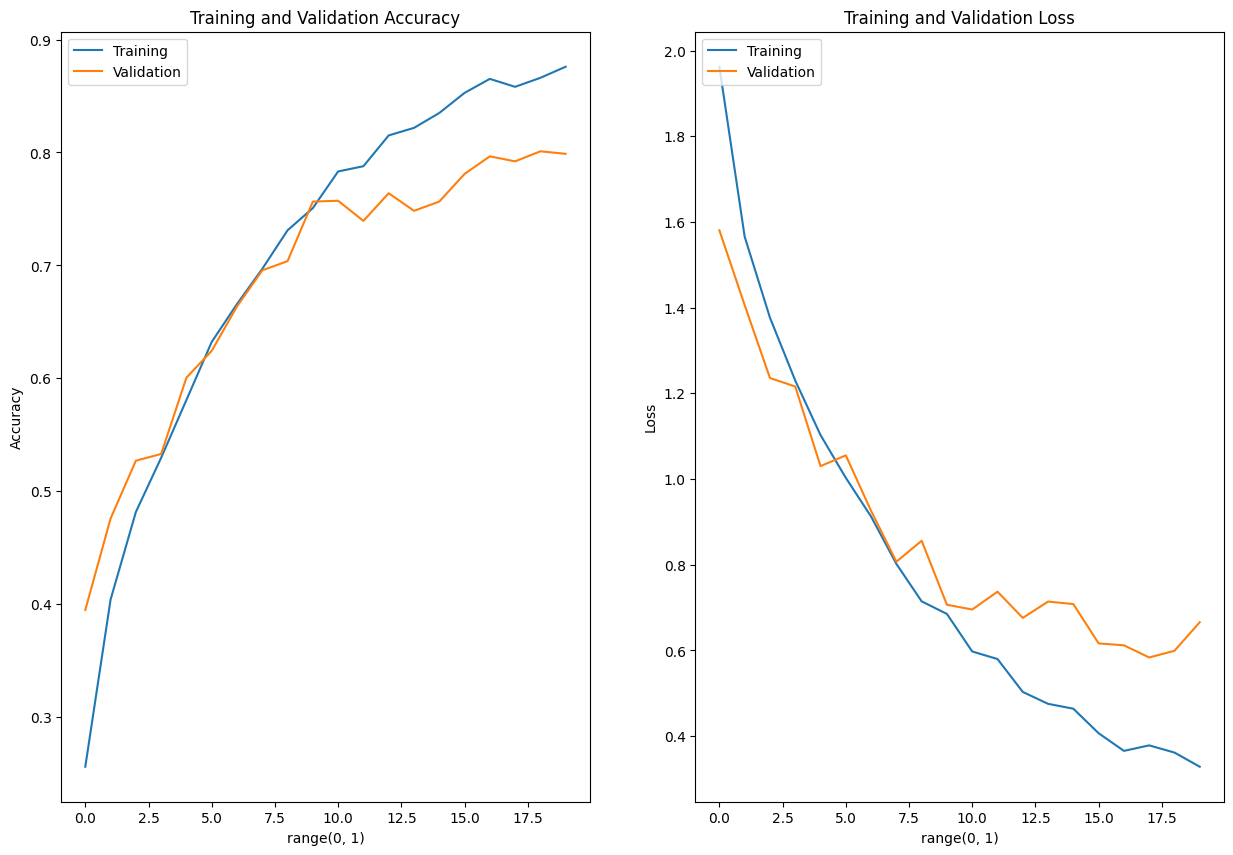

In [46]:
# Plotting the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel(epochs_range)
plt.legend(['Training', 'Validation'], loc='upper left')

# Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel(epochs_range)
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

**We observe that Training accuracy is 87%, while validation accuracy is 79%. This means model is overfitting.
We need to address class imbalance problem to resolve overfitting. We will do this by increasing the number of samples using Augmentor.**

Repeat steps 5 to 7, with increased sample size of 700.

**Step 5: Model building**

In [47]:
# Add 700 samples of each class
for i in class_names:
    p = Augmentor.Pipeline(data_dir_train / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(700)

Initialised with 114 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC08039EA40>: 100%|██████████| 700/700 [00:23<00:00, 29.19 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC00B0191E0>: 100%|██████████| 700/700 [00:25<00:00, 27.11 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC00B579930>: 100%|██████████| 700/700 [00:25<00:00, 28.00 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BC00B6F54E0>: 100%|██████████| 700/700 [02:05<00:00,  5.58 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7BC00B550340>: 100%|██████████| 700/700 [01:58<00:00,  5.90 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC09A41AFE0>: 100%|██████████| 700/700 [00:25<00:00, 27.15 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7BC00B6A40D0>: 100%|██████████| 700/700 [00:55<00:00, 12.52 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC08035E3B0>: 100%|██████████| 700/700 [00:25<00:00, 27.96 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BC00B47F2E0>: 100%|██████████| 700/700 [00:25<00:00, 27.89 Samples/s]


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images to the range [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Shift the image horizontally by up to 20% of its width
    height_shift_range=0.2,  # Shift the image vertically by up to 20% of its height
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in new pixels with the nearest pixel value
)

In [50]:
# Train dataset
df_train1 = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size=(img_height,img_width),
                                                               label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 13039 files belonging to 9 classes.
Using 10432 files for training.


In [51]:
# Validation dataset
df_validation1 =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                   batch_size=batch_size,
                                                                   image_size=(img_height,img_width),
                                                                   label_mode='categorical',
                                                                   seed=123,subset="validation",
                                                                   validation_split=0.2)

Found 13039 files belonging to 9 classes.
Using 2607 files for validation.


In [52]:
# Initialize sequential model
#from tensorflow.keras.layers import Normalization
model1 = Sequential()

# Rescaling
model1.add(Rescaling(1./255, input_shape=(180, 180, 3)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
# First Convulation layer
model1.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

# Second Convulation Layer
model1.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

# Third Convulation Layer
model1.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

# Dropout layer
model1.add(layers.Dropout(0.5)) # Drop 50% of the input

# Flattening layer
model1.add(layers.Flatten())

# Dense layer
model1.add(layers.Dense(128,activation='relu'))

# Dropout layer
model1.add(layers.Dropout(0.25)) #25% of input fraction to be dropped

# Dense Layer along with softmax activation function
model1.add(layers.Dense(len(class_names),activation='softmax'))

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,944,413 (76.08 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,296,276 (50.72 MB)

In [54]:
# Compile model with Adam optimization

model1.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

**Step 6: Model training**

In [55]:
epochs = 20
history = model1.fit(df_train1, validation_data=df_validation1, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2538 - loss: 1.9253
Epoch 1: val_accuracy improved from -inf to 0.50786, saving model to model.keras
326/326 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.2540 - loss: 1.9246 - val_accuracy: 0.5079 - val_loss: 1.3232
Epoch 2/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4698 - loss: 1.4022
Epoch 2: val_accuracy improved from 0.50786 to 0.57921, saving model to model.keras
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 146ms/step - accuracy: 0.4699 - loss: 1.4020 - val_accuracy: 0.5792 - val_loss: 1.1268
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5787 - loss: 1.1384
Epoch 3: val_accuracy did not improve from 0.57921
326/326 ━━━━━━━━━━━━━━━━━━━━ 47s 143ms/step - accuracy: 0.5788 - loss: 1.1383 - val_accuracy: 0.5508 - val_loss: 1.2294
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6276 - loss: 0.9914
Epoch 4: val_accuracy improved from 0.57921 to 0.71231, saving model to 

**Step 7: Model Visualization**

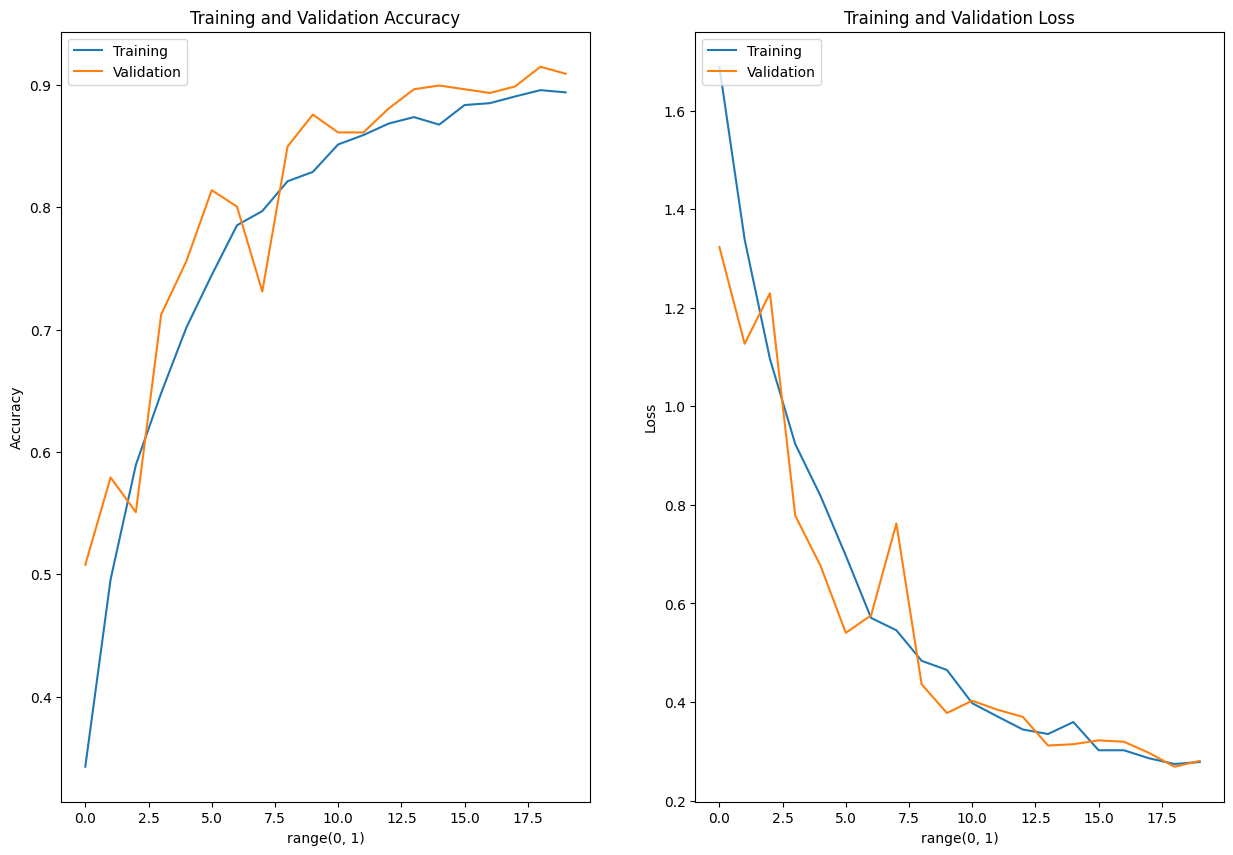

In [56]:
# Plotting the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel(epochs_range)
plt.legend(['Training', 'Validation'], loc='upper left')

# Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel(epochs_range)
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

**Above plot shows training accuracy of 89% and validation accuracy of 90%. Hence, it can be conluded that we have addressed the issue of overfitting with increased number of samples. We will consider this as our final model.**